In [46]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from response_distributions_util import plot_metric
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import scipy  
import scikits.bootstrap as bootstrap  
  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
from numpy import median

In [48]:
df = pd.read_csv('../../data/responses_with_traces.tsv', sep = '\t', parse_dates=True)
df['trace_data'] = df['trace_data'].apply(lambda x: eval(x))
def get_single_motivation(m):
    if len(m.split('|')) == 1:
        return m
    return None
df['single motivation'] = df['motivation'].apply(get_single_motivation)

In [49]:
metric = 'dwell_time'

In [50]:
from datetime import datetime
import time

def get_dwell_time(trace):
    if len(trace) < 2:
        return 0
    else:
        fmt = '%Y-%m-%d %H:%M:%S'
        d1 = datetime.strptime(trace[0]['t'], fmt)
        d2 = datetime.strptime(trace[-1]['t'], fmt)
        
        # convert to unix timestamp
        d1_ts = time.mktime(d1.timetuple())
        d2_ts = time.mktime(d2.timetuple())

        # they are now in seconds, subtract and then divide by 60 to get minutes.
        return (d2_ts-d1_ts) / 60

In [51]:
df[metric] = df['trace_data'].apply(get_dwell_time)
#df[metric] = df[metric].apply(lambda x: min(50,x))

(array([ 19553.,   2650.,   2197.,   1699.,   1018.,    810.,    652.,
           724.,    882.,   1347.]),
 array([    0.        ,   143.98333333,   287.96666667,   431.95      ,
          575.93333333,   719.91666667,   863.9       ,  1007.88333333,
         1151.86666667,  1295.85      ,  1439.83333333]),
 <a list of 10 Patch objects>)

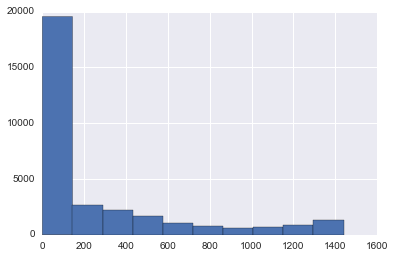

In [52]:
plt.hist(df[metric])

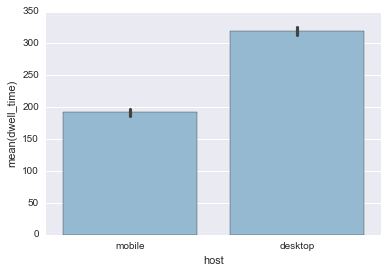

In [53]:
plot_metric(df, 'host', metric)

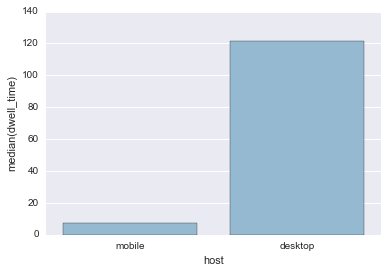

In [54]:
plot_metric(df, 'host', metric, estimator = median, ci = None)

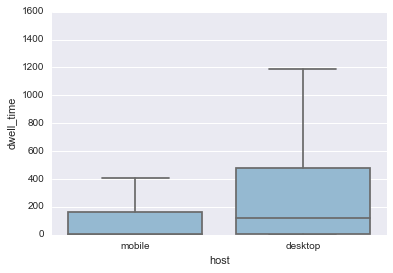

In [55]:
plot_metric(df, 'host', metric, kind = 'box')

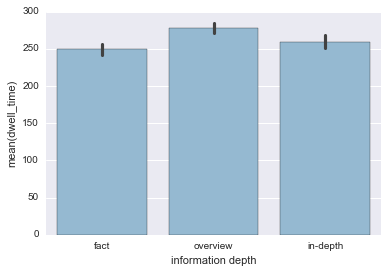

In [56]:
plot_metric(df, 'information depth', metric, estimator = np.mean)

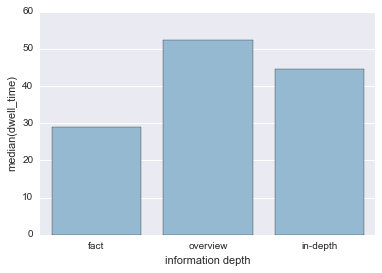

In [57]:
plot_metric(df, 'information depth', metric, estimator = median, ci = None)

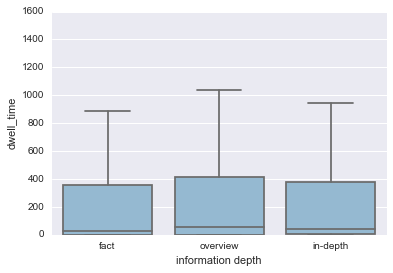

In [58]:
plot_metric(df, 'information depth', metric, kind = 'box')

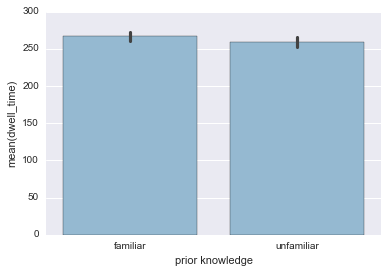

In [59]:
plot_metric(df, 'prior knowledge', metric)

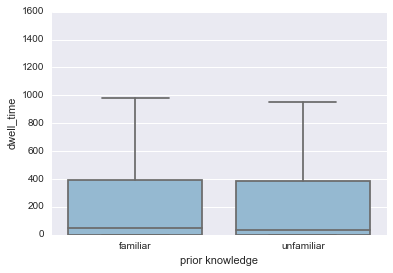

In [60]:
plot_metric(df, 'prior knowledge', metric, kind = 'box')

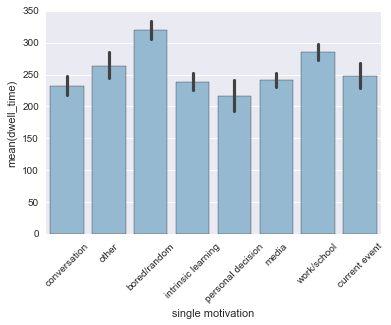

In [61]:
plot_metric(df, 'single motivation', metric, rotate = True)

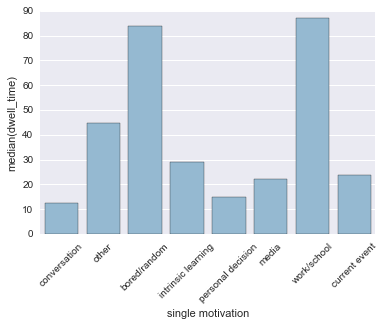

In [62]:
plot_metric(df, 'single motivation', metric, rotate = True, estimator = median, ci = None)

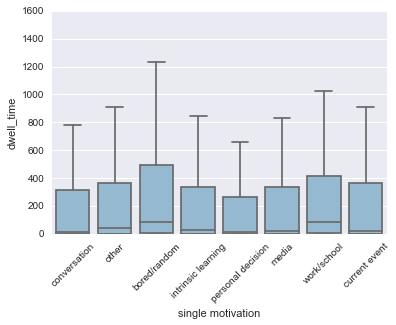

In [63]:
plot_metric(df, 'single motivation', metric, estimator = median,ci =None, rotate = True, kind = 'box')